In [1]:
%matplotlib inline

from d2l import tensorflow as d2l

In [2]:
from xinet.utils import plt, set_figsize
from xinet import tensorflow as xinet

np = xinet.np

In [3]:
from tensorflow import constant

true_w = constant([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0], '\nlabel:', labels[0])

features: tf.Tensor([ 1.5614767 -0.5100449], shape=(2,), dtype=float32) 
label: tf.Tensor([9.045954], shape=(1,), dtype=float32)


In [5]:
from xinet.utils import plt, set_figsize

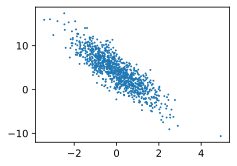

In [6]:
set_figsize()
plt.scatter(features[:, (1)], labels, 1);

In [7]:
batch_size = 10
data_iter = xinet.load_array((features, labels), batch_size)

In [9]:
next(iter(data_iter))

(<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
 array([[-1.1708367 , -1.3760674 ],
        [ 0.01995075,  1.3736017 ],
        [ 2.0695975 ,  1.373568  ],
        [-1.8288866 ,  0.8157843 ],
        [-0.85592705,  1.6372836 ],
        [-0.43475705, -0.08252064],
        [ 1.0665896 , -1.032672  ],
        [-0.7365173 ,  0.36369494],
        [ 0.6963138 , -0.08324704],
        [ 1.1890988 , -1.1488564 ]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 6.51951   ],
        [-0.43082306],
        [ 3.6694245 ],
        [-2.2410233 ],
        [-3.0789955 ],
        [ 3.6154351 ],
        [ 9.837692  ],
        [ 1.4982285 ],
        [ 5.897667  ],
        [10.47767   ]], dtype=float32)>)